In [42]:
# importing the required libraries

import numpy as np
import pandas as pd # for handling data in the form of tables
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor # for using the model
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error  #To use various error functions

In [2]:
pwd

'C:\\Users\\hi\\Documents\\Artificial Intelligence'

In [5]:
# dataset

ds = pd.read_csv(r"C:\Users\hi\Downloads\500_Person_Gender_Height_weight_Index.csv")
ds.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
ds.shape

(500, 4)

In [7]:
ds.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [8]:
ds.isna().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [9]:
ds.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [10]:
# From the above we can say that there is no NAN(not a number) in the dataset

In [12]:
# <--------->

In [16]:
x=ds[['Height','Weight']] # Features
y=ds['Index'] # Target variables

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) # splitting the data

In [19]:
model = KNeighborsRegressor(n_neighbors=2)

In [20]:
# Use the KNN regressor and specify the number of neighbors desired.
# if p=1 then manhatten distance will be used.
# Default is p=2 - euclidean_distance

In [21]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [23]:
y_pred = model.predict(x_test)
y_pred

array([5. , 5. , 4. , 5. , 5. , 5. , 3. , 5. , 3.5, 5. , 2. , 3.5, 2. ,
       5. , 5. , 3. , 5. , 2.5, 5. , 4. , 4. , 3. , 2.5, 3.5, 2. , 1.5,
       5. , 4. , 4. , 2.5, 3. , 5. , 5. , 5. , 4. , 0. , 5. , 2.5, 5. ,
       2. , 5. , 4. , 4. , 4.5, 4. , 3. , 5. , 2. , 5. , 5. , 4. , 4. ,
       3. , 5. , 5. , 3. , 4. , 4. , 0.5, 4. , 4. , 4. , 4. , 1.5, 4. ,
       3.5, 2. , 3. , 5. , 4.5, 5. , 5. , 4. , 4. , 4. , 5. , 4. , 4.5,
       5. , 5. , 5. , 3.5, 4. , 5. , 5. , 2. , 5. , 5. , 4.5, 3.5, 2.5,
       2. , 2.5, 1. , 3. , 1. , 3.5, 4. , 0. , 3. ])

In [25]:
y_pred.shape

(100,)

In [26]:
y_test.shape

(100,)

In [27]:
# Keep the original and predicted values in a data frame.

Actual_predicted=pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
Actual_predicted

,Actual,Predicted
90,5,5.0
254,5,5.0
283,4,4.0
445,5,5.0
461,5,5.0
...,...,...
372,1,1.0
56,4,3.5
440,4,4.0
60,0,0.0


In [29]:
r2_score(y_test,y_pred)

0.9410759530964586

In [30]:
mean_absolute_error(y_test,y_pred)

0.14

In [31]:
mean_squared_error(y_test,y_pred)

0.1

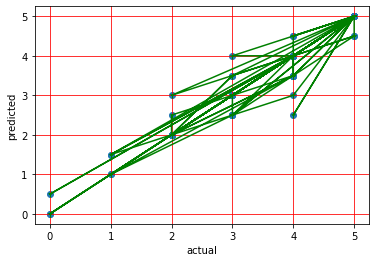

In [49]:
plt.plot(y_test,y_pred,color='g',marker='1')
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.grid(color='red')
plt.show()

In [32]:
# <---------->

In [33]:
# predicting unknown

In [35]:
m = np.array([170,76])
n = model.predict(m.reshape(1,-1))

In [36]:
print(n)

[3.]


In [37]:
# How to choose the k value

In [38]:
# For every possible value of "K", check the error on test data. Select the "K" value which as lowest error.

In [40]:
mse_val = [] #to store mse values for different k
for K in range(5): # Let's check the value of k upto 5
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train) #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = metrics.mean_squared_error(y_test,pred) #calculate rmse
    mse_val.append(error) #store mse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  1 is: 0.14
MSE value for k=  2 is: 0.1
MSE value for k=  3 is: 0.07222222222222222
MSE value for k=  4 is: 0.0825
MSE value for k=  5 is: 0.0776


In [41]:
# here the error is less for k=5. so the best value of k is 5